In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

In [2]:
movies = pd.read_csv("./IMDb Files/IMDb movies.csv")
moviesdf = pd.DataFrame(movies)

/home/kt/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
moviesdf.drop(columns=['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore'], inplace=True, axis=1)
moviesdf.drop(moviesdf.loc[moviesdf['year']=="TV Movie 2019"].index, inplace=True)

In [4]:
# filling in the na as 0 for reviews as reviews are on a scale of 0-10
moviesdf["reviews_from_users"].fillna(0, inplace=True)
moviesdf["reviews_from_critics"].fillna(0, inplace=True)
moviesdf.isnull().sum()

imdb_title_id              0
title                      0
original_title             0
year                       0
date_published             0
genre                      0
duration                   0
country                   64
language                 833
director                  87
writer                  1572
production_company      4455
actors                    69
description             2115
avg_vote                   0
votes                      0
reviews_from_users         0
reviews_from_critics       0
dtype: int64

In [5]:
# filling in the na for the attributes that should remain as strings
# all NA are UNKNOWN
moviesdf.fillna("UNKNOWN", inplace=True)
moviesdf.isnull().sum()

imdb_title_id           0
title                   0
original_title          0
year                    0
date_published          0
genre                   0
duration                0
country                 0
language                0
director                0
writer                  0
production_company      0
actors                  0
description             0
avg_vote                0
votes                   0
reviews_from_users      0
reviews_from_critics    0
dtype: int64

In [6]:
ratings = pd.read_csv("./IMDb Files/IMDb ratings.csv")
ratingsdf = pd.DataFrame(ratings)

In [7]:
ratingsdf.drop(columns=['allgenders_0age_avg_vote',
                         'allgenders_0age_votes',
                         'allgenders_18age_avg_vote',
                         'allgenders_18age_votes',
                         'allgenders_30age_avg_vote',
                         'allgenders_30age_votes',
                         'allgenders_45age_avg_vote',
                         'allgenders_45age_votes',
                         'males_0age_avg_vote',
                         'males_0age_votes',
                         'males_18age_avg_vote',
                         'males_18age_votes',
                         'males_30age_avg_vote',
                         'males_30age_votes', 
                         'males_45age_avg_vote', 
                         'males_45age_votes', 
                         'females_0age_avg_vote', 
                         'females_0age_votes', 
                         'females_18age_avg_vote', 
                         'females_18age_votes', 
                         'females_30age_avg_vote', 
                         'females_30age_votes', 
                         'females_45age_avg_vote', 
                         'females_45age_votes', 
                         'top1000_voters_rating', 
                         'top1000_voters_votes', 
                         'us_voters_rating', 
                         'us_voters_votes', 
                         'non_us_voters_rating', 
                         'non_us_voters_votes'], inplace=True, axis=1)

In [8]:
ratingsdf.fillna(0, inplace=True)
ratingsdf.isnull().sum()

imdb_title_id               0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_allages_votes         0
females_allages_avg_vote    0
females_allages_votes       0
dtype: int64

In [9]:
# merging the two merged dataframes into one complete dataframe based on 'imdb_title_id'
complete_df = pd.merge( moviesdf, ratingsdf, on='imdb_title_id', how='outer')

# removes all movies that do not have USA as one of the countries
complete_df.loc[ (complete_df['country'].str.contains('USA') == False), 'country'] = np.NaN
complete_df.dropna(inplace=True)
print(complete_df.isnull().sum()) # all n/a should be dropped

complete_df['avg_vote'] = complete_df['avg_vote'].round()
complete_df['mean_vote'] = complete_df['mean_vote'].round()

imdb_title_id               0
title                       0
original_title              0
year                        0
date_published              0
genre                       0
duration                    0
country                     0
language                    0
director                    0
writer                      0
production_company          0
actors                      0
description                 0
avg_vote                    0
votes                       0
reviews_from_users          0
reviews_from_critics        0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_alla

In [10]:
### Splitting Genres

col = set()

a = list(complete_df["genre"])

for w in a:
    b = set(w.split(", "))
    col = col.union(b)    

for g in col:
    complete_df[g] = 0


for g in col:
    complete_df.loc[complete_df['genre'].str.contains(g),g] = 1
    
df1 = complete_df.iloc[:,-len(col):]
df1.head(10)


,Horror,Animation,Documentary,Comedy,Musical,Biography,Mystery,Thriller,Fantasy,Western,...,Family,Sport,Romance,News,Film-Noir,History,Drama,Crime,Music,Sci-Fi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
23,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
### Splitting Languages
col = set()

a = list(complete_df["language"])

for w in a:
    b = set(w.split(", "))
    col = col.union(b)    

for g in col:
    complete_df[("Language: "+g)] = 0


for g in col:
    complete_df.loc[complete_df['language'].str.contains(g), ("Language: "+g)] = 1

languages = ["Language: " + lang for lang in col]
df1 = complete_df.iloc[:,-len(col):]
df1.head(10)

/home/kt/.local/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Language: Nama,Language: Esperanto,Language: Maltese,Language: Akan,Language: Aramaic,Language: Nahuatl,Language: Kirundi,Language: Slovenian,Language: Catalan,Language: Yoruba,...,Language: Irish,Language: Mapudungun,Language: British Sign Language,Language: Saami,Language: Shoshoni,Language: Yiddish,Language: Turkmen,Language: German,Language: Rotuman,Language: Min Nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# ### Splitting Countries
# ### TODO:Why did we do this?

# col = set()

# a = list(complete_df["country"])

# for w in a:
#     b = set(w.split(", "))
#     col = col.union(b)    

# for g in col:
#     complete_df[g] = 0


# for g in col:
#     complete_df.loc[complete_df['country'].str.contains(g),g] = 1
    

# EDA

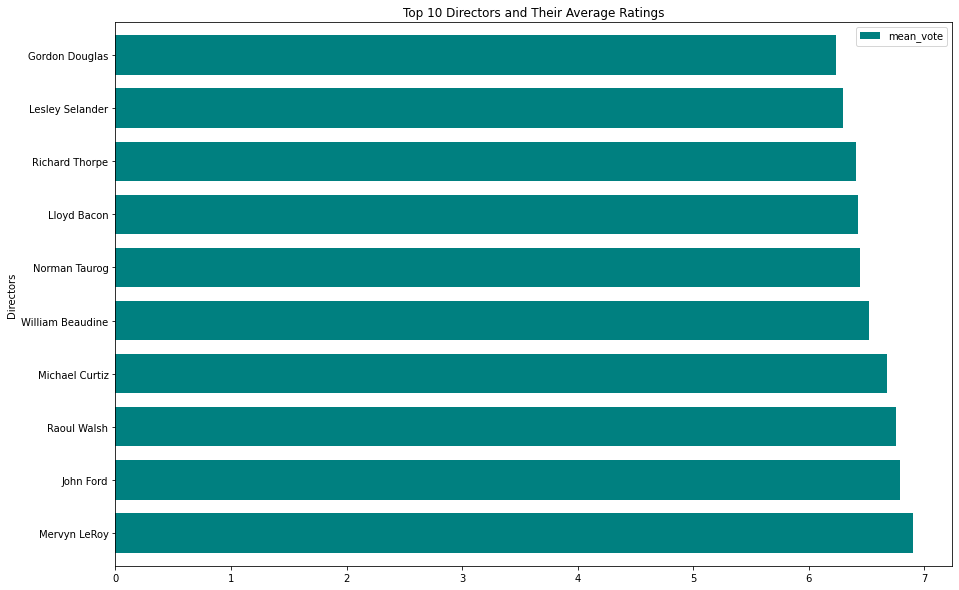

In [13]:
# to get the mena of the avg votes
directors_mean_df = complete_df.groupby(['director'])[['mean_vote']].mean()

# to get the total movies they worked on
directors_total_df = complete_df.groupby(['director'])[['title']].count()

all_directors_df = pd.concat([directors_mean_df, directors_total_df], axis=1)
all_directors_df = all_directors_df.sort_values(['title'], ascending = False)

top_ten_directors = all_directors_df.head(10)

top_ten_directors = top_ten_directors.sort_values(['mean_vote'], ascending = False)
top_ten_directors.plot.barh(figsize=(15,10), y='mean_vote', width=.75, xlabel="Directors", title="Top 10 Directors and Their Average Ratings", color=["teal"]);


In [ ]:
### More data cleaning

directors = {"Name": [], "UID": []}
ls = complete_df["director"].unique()
for idx, x in enumerate(ls):
    directors["Name"].append(x)
    directors["UID"].append(idx)
    complete_df["director"].replace(x, idx, inplace=True)
    
directors = pd.DataFrame(directors)
directors.to_csv("directors.csv", sep=',')

## Old EDA Based on Grouped Genres

In [ ]:
genredf = complete_df.groupby(['genre'])[['mean_vote']].mean().reset_index();
genredf = genredf.sort_values(['mean_vote'], ascending = False);

toptengenre = genredf.head(10)

toptengenre.plot.barh(figsize=(15,8), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Ratings", color="teal");
plt.xlabel("Average Ratings")
plt.xticks(rotation='horizontal');


male_female_genre = complete_df.groupby(['genre'])[['males_allages_avg_vote', 'females_allages_avg_vote']].mean().reset_index();
male_genre = male_female_genre.sort_values(['males_allages_avg_vote'], ascending = False);
female_genre = male_female_genre.sort_values(['females_allages_avg_vote'], ascending = False);


male_genre = male_genre.head(10)
male_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Male Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");


female_genre = female_genre.head(10)
female_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Female Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");

## New EDA Based on Single Genres

In [ ]:
Comedy = complete_df.groupby(['Comedy'])[['males_allages_avg_vote']].mean().reset_index();
Action = complete_df.groupby(['Action'])[['males_allages_avg_vote']].mean().reset_index();
Horror = complete_df.groupby(['Horror'])[['males_allages_avg_vote']].mean().reset_index();
Family = complete_df.groupby(['Family'])[['males_allages_avg_vote']].mean().reset_index();
Musical = complete_df.groupby(['Musical'])[['males_allages_avg_vote']].mean().reset_index();
Music = complete_df.groupby(['Music'])[['males_allages_avg_vote']].mean().reset_index();
Documentary = complete_df.groupby(['Documentary'])[['males_allages_avg_vote']].mean().reset_index();
Mystery = complete_df.groupby(['Mystery'])[['males_allages_avg_vote']].mean().reset_index();
Sci_Fi = complete_df.groupby(['Sci-Fi'])[['males_allages_avg_vote']].mean().reset_index();
News = complete_df.groupby(['News'])[['males_allages_avg_vote']].mean().reset_index();
Crime = complete_df.groupby(['Crime'])[['males_allages_avg_vote']].mean().reset_index();
Adventure = complete_df.groupby(['Adventure'])[['males_allages_avg_vote']].mean().reset_index();
Film_Noir = complete_df.groupby(['Film-Noir'])[['males_allages_avg_vote']].mean().reset_index();
History = complete_df.groupby(['History'])[['males_allages_avg_vote']].mean().reset_index();
Thriller = complete_df.groupby(['Thriller'])[['males_allages_avg_vote']].mean().reset_index();
Sport = complete_df.groupby(['Sport'])[['males_allages_avg_vote']].mean().reset_index();
Western = complete_df.groupby(['Western'])[['males_allages_avg_vote']].mean().reset_index();
Biography = complete_df.groupby(['Biography'])[['males_allages_avg_vote']].mean().reset_index();
War = complete_df.groupby(['War'])[['males_allages_avg_vote']].mean().reset_index();
Fantasy = complete_df.groupby(['Fantasy'])[['males_allages_avg_vote']].mean().reset_index();
Reality_TV = complete_df.groupby(['Reality-TV'])[['males_allages_avg_vote']].mean().reset_index();
Drama = complete_df.groupby(['Drama'])[['males_allages_avg_vote']].mean().reset_index();
Animation = complete_df.groupby(['Animation'])[['males_allages_avg_vote']].mean().reset_index();
Romance = complete_df.groupby(['Romance'])[['males_allages_avg_vote']].mean().reset_index();
Adult = complete_df.groupby(['Adult'])[['males_allages_avg_vote']].mean().reset_index();
genres = pd.concat([Comedy, Action, Horror, Family, Musical, Music, Documentary, Mystery, Sci_Fi, News, Crime, Adventure, Film_Noir, History, Thriller, Sport, Western, Biography, War, Fantasy, Reality_TV, Drama, Animation, Romance, Adult], axis=1);
genres = genres.drop([0])
male_genres_melt = genres.melt(id_vars=[], 
                          var_name="Genre", 
                          value_name="Male Mean Vote")

male_genres_melt = male_genres_melt.loc[male_genres_melt["Male Mean Vote"] != 1.00000]

genres = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']

male_genres_melt.insert(loc=0, column='Genres', value=genres)
male_genres_melt.head()

male_genres_melt.drop(['Genre'], axis=1)


In [ ]:
Comedy = complete_df.groupby(['Comedy'])[['females_allages_avg_vote']].mean().reset_index();
Action = complete_df.groupby(['Action'])[['females_allages_avg_vote']].mean().reset_index();
Horror = complete_df.groupby(['Horror'])[['females_allages_avg_vote']].mean().reset_index();
Family = complete_df.groupby(['Family'])[['females_allages_avg_vote']].mean().reset_index();
Musical = complete_df.groupby(['Musical'])[['females_allages_avg_vote']].mean().reset_index();
Music = complete_df.groupby(['Music'])[['females_allages_avg_vote']].mean().reset_index();
Documentary = complete_df.groupby(['Documentary'])[['females_allages_avg_vote']].mean().reset_index();
Mystery = complete_df.groupby(['Mystery'])[['females_allages_avg_vote']].mean().reset_index();
Sci_Fi = complete_df.groupby(['Sci-Fi'])[['females_allages_avg_vote']].mean().reset_index();
News = complete_df.groupby(['News'])[['females_allages_avg_vote']].mean().reset_index();
Crime = complete_df.groupby(['Crime'])[['females_allages_avg_vote']].mean().reset_index();
Adventure = complete_df.groupby(['Adventure'])[['females_allages_avg_vote']].mean().reset_index();
Film_Noir = complete_df.groupby(['Film-Noir'])[['females_allages_avg_vote']].mean().reset_index();
History = complete_df.groupby(['History'])[['females_allages_avg_vote']].mean().reset_index();
Thriller = complete_df.groupby(['Thriller'])[['females_allages_avg_vote']].mean().reset_index();
Sport = complete_df.groupby(['Sport'])[['females_allages_avg_vote']].mean().reset_index();
Western = complete_df.groupby(['Western'])[['females_allages_avg_vote']].mean().reset_index();
Biography = complete_df.groupby(['Biography'])[['females_allages_avg_vote']].mean().reset_index();
War = complete_df.groupby(['War'])[['females_allages_avg_vote']].mean().reset_index();
Fantasy = complete_df.groupby(['Fantasy'])[['females_allages_avg_vote']].mean().reset_index();
Reality_TV = complete_df.groupby(['Reality-TV'])[['females_allages_avg_vote']].mean().reset_index();
Drama = complete_df.groupby(['Drama'])[['females_allages_avg_vote']].mean().reset_index();
Animation = complete_df.groupby(['Animation'])[['females_allages_avg_vote']].mean().reset_index();
Romance = complete_df.groupby(['Romance'])[['females_allages_avg_vote']].mean().reset_index();
Adult = complete_df.groupby(['Adult'])[['females_allages_avg_vote']].mean().reset_index();
genres = pd.concat([Comedy, Action, Horror, Family, Musical, Music, Documentary, Mystery, Sci_Fi, News, Crime, Adventure, Film_Noir, History, Thriller, Sport, Western, Biography, War, Fantasy, Reality_TV, Drama, Animation, Romance, Adult], axis=1);
genres = genres.drop([0])
female_genres_melt = genres.melt(id_vars=[], 
                          var_name="Genre", 
                          value_name="Female Mean Vote")

female_genres_melt = female_genres_melt.loc[female_genres_melt["Female Mean Vote"] != 1.00000]

genres = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']

female_genres_melt.insert(loc=0, column='Genres', value=genres)
female_genres_melt.head()

female_genres_melt.drop(['Genre'], axis=1)


In [ ]:
# Top ten movie genres based on ratings by male and females
top_ten_male_genres_melt = male_genres_melt.head(10)
top_ten_female_genres_melt = female_genres_melt.head(10)

top_ten_male_genres_melt = top_ten_male_genres_melt.sort_values(['Male Mean Vote'], ascending = True);
top_ten_female_genres_melt = top_ten_female_genres_melt.sort_values(['Female Mean Vote'], ascending = True);

top_ten_male_genres_melt.plot(figsize=(15,9), kind="barh", x="Genres", color="royalblue", title="Top Ten Movie Genres and their Ratings by Males")
plt.xlabel("Average Ratings")
top_ten_female_genres_melt.plot(figsize=(15,9), kind="barh", x="Genres", color="palevioletred", title="Top Ten Movie Genres and their Ratings by Females")
plt.xlabel("Average Ratings");

In [ ]:
Comedy = complete_df.groupby(['Comedy'])[['mean_vote']].mean().reset_index();
Action = complete_df.groupby(['Action'])[['mean_vote']].mean().reset_index();
Horror = complete_df.groupby(['Horror'])[['mean_vote']].mean().reset_index();
Family = complete_df.groupby(['Family'])[['mean_vote']].mean().reset_index();
Musical = complete_df.groupby(['Musical'])[['mean_vote']].mean().reset_index();
Music = complete_df.groupby(['Music'])[['mean_vote']].mean().reset_index();
Documentary = complete_df.groupby(['Documentary'])[['mean_vote']].mean().reset_index();
Mystery = complete_df.groupby(['Mystery'])[['mean_vote']].mean().reset_index();
Sci_Fi = complete_df.groupby(['Sci-Fi'])[['mean_vote']].mean().reset_index();
News = complete_df.groupby(['News'])[['mean_vote']].mean().reset_index();
Crime = complete_df.groupby(['Crime'])[['mean_vote']].mean().reset_index();
Adventure = complete_df.groupby(['Adventure'])[['mean_vote']].mean().reset_index();
Film_Noir = complete_df.groupby(['Film-Noir'])[['mean_vote']].mean().reset_index();
History = complete_df.groupby(['History'])[['mean_vote']].mean().reset_index();
Thriller = complete_df.groupby(['Thriller'])[['mean_vote']].mean().reset_index();
Sport = complete_df.groupby(['Sport'])[['mean_vote']].mean().reset_index();
Western = complete_df.groupby(['Western'])[['mean_vote']].mean().reset_index();
Biography = complete_df.groupby(['Biography'])[['mean_vote']].mean().reset_index();
War = complete_df.groupby(['War'])[['mean_vote']].mean().reset_index();
Fantasy = complete_df.groupby(['Fantasy'])[['mean_vote']].mean().reset_index();
Reality_TV = complete_df.groupby(['Reality-TV'])[['mean_vote']].mean().reset_index();
Drama = complete_df.groupby(['Drama'])[['mean_vote']].mean().reset_index();
Animation = complete_df.groupby(['Animation'])[['mean_vote']].mean().reset_index();
Romance = complete_df.groupby(['Romance'])[['mean_vote']].mean().reset_index();
Adult = complete_df.groupby(['Adult'])[['mean_vote']].mean().reset_index();
genres = pd.concat([Comedy, Action, Horror, Family, Musical, Music, Documentary, Mystery, Sci_Fi, News, Crime, Adventure, Film_Noir, History, Thriller, Sport, Western, Biography, War, Fantasy, Reality_TV, Drama, Animation, Romance, Adult], axis=1);
genres = genres.drop([0])
genres_melt = genres.melt(id_vars=[], 
                          var_name="Genre", 
                          value_name="Mean Vote")

genres_melt = genres_melt.loc[genres_melt["Mean Vote"] != 1.00000]

genres = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']

genres_melt.insert(loc=0, column='Genres', value=genres)
genres_melt.head()

genres_melt.drop(['Genre'], axis=1)


In [ ]:
# Top ten movie genres based on ratings
genres_melt = genres_melt.sort_values(['Mean Vote'], ascending = True);
genres_melt.plot.barh(figsize=(15,9), x="Genres", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Ratings", color="teal");
plt.xlabel("Average Ratings")
plt.xticks(rotation='horizontal');

## EDA for Country Data

In [ ]:
## EDA, Looking For Relation between Country Origin & Rating
## ---------------------------------------------------------

## Finding Most Used Countries (top 10)
most_freq_countries = list(complete_df['country'].value_counts()[:10].index)

## Shrink Dataframe by Top10 Countries
df_ = complete_df[complete_df['country'].isin(most_freq_countries)]

## Calculating Avg Rating per Countries
s = df_.groupby(by=['country'])['mean_vote'].sum() #sum
c = df_['country'].value_counts()                  #counts

s.sort_index(inplace=True)
c.sort_index(inplace=True)

avg_rating_countries = s/c

## Graphing Findings
avg_rating_countries.plot.barh(figsize=(15,10), width=.75, title="Top 10 Most Frequent Countries with Average Ratings of All Their Films")
plt.xlabel("Average Ratings")
plt.show()

In [ ]:
## EDA, Looking For Relation between Country Origin & Rating (Continued)
## ---------------------------------------------------------

#Plotting Freq Counts
s.plot.barh(figsize=(15,10), width=.75, title="Top 10 Countries with Frequency Counts of Films Released")
plt.xlabel("Counts")

In [ ]:
## EDA, Looking For Relation between Country Origin & Rating (Continued)
## ---------------------------------------------------------

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
country = []
#Plotting Quartile Info
for i in most_freq_countries:
    df2 = df_[df_['country'] == i]
    country.append(df2['mean_vote'])
    
ax.set_xticklabels(most_freq_countries)
bp = ax.boxplot(country)

plt.show()

# Modeling

In [ ]:
# complete_df.to_csv("clean_data.csv", sep=',')
df = complete_df

df = df.sample(frac = .2)
df_test = df.drop(df.index)

In [ ]:
list(df.columns)

In [ ]:
# a = [].append(df["language"].unique())
# a = ["hello"] languages
# print(a)
# print(languages.)

In [ ]:
from sklearn.linear_model import LogisticRegression

features = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'duration', 'year', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']
added_features = ["director"] + languages

f = features + added_features

X = np.array(df[f])
y = np.array(df['mean_vote']) 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

####### The following models used all the features.

#### ATTEMPTED: SVC linear/nonlinear takes too long for our dataset size
#### Added this challenge to the presentation
# clf_lin = svm.SVC(kernel = 'linear')
# clf_lin.fit(X_train, y_train)
# y_predict = clf_lin.predict( X_test)
# print(metrics.classification_report(y_test, y_predict))

# clf_nonlin = svm.SVC(kernel = 'rbf')
# clf_nonlin.fit(X_train, y_train)
# y_predict2 = clf_nonlin.predict( X_test)
# print(metrics.classification_report(y_test, y_predict2))

In [ ]:
def knn_pred_model( test_split, X_set, y_set):
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size = test_split, random_state = 35)
    reg_knn = KNeighborsClassifier()
    reg_knn.fit(X_train, y_train)
    y_pred = reg_knn.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))


#### Accuracy is very low with the following models.
#### Using anything >= 40% of testing set gives warning about zero_division
print( "KNeighborsClassifier with testing 30%")
knn_pred_model( 0.30, X, y)
print( "KNeighborsClassifier with testing 50%")
knn_pred_model( 0.50, X, y)
print( "KNeighborsClassifier with testing 70%")
knn_pred_model( 0.70, X, y)

In [ ]:
from sklearn.cluster import KMeans

def kmeans_pred_model( test_split, X_set, y_set):
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size = test_split, random_state = 35)
    kmeans = KMeans(n_clusters=10, random_state=0)
    kmeans.fit(X_train, y_train)
    y_predict = kmeans.predict( X_test)
    print(metrics.classification_report(y_test, y_predict))


#### KMeans led to less than 0.1 accuracy on every run
#### also led to warnings
print( "KMeans with testing 30%")
kmeans_pred_model( 0.30, X, y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Selecting the best 10 features
X_ten = SelectKBest(chi2, k=10).fit_transform(X, y)
#### Led to only around 35% accuracy
print( "KNeighborsClassifier with testing 30%, best 10 features")
knn_pred_model( 0.30, X_ten, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def dtc_pred_model( test_split, X_set, y_set):
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size = test_split, random_state = 35)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

#### using a DecisionTreeClassifier led to lower accuracy than previous models
dtc_pred_model( 0.30, X, y)
# dtc_pred_model(0.30, X_new, y)

In [ ]:
"""
our main issue is figuring out how to create more accurate models
from research, it says that we need to add more data to the model
the features we are using may not be giving us the correct information
we're looking for.
"""

